### Import Library

In [1]:
import numpy as np
import pandas as pd

### Import Dataset

In [2]:
df_london = pd.read_csv("london_crime_by_lsoa.csv")
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat informasi dari dataset, baik dari jumlah data, jumlah kolom dan tipe data pada masing-masing kolom

In [3]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Mengecek apakah terdapat NaN ataupun Null

In [4]:
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Dari hasil pengecekan tidak ditemukan NaN atau Null, jadi dapat lanjut ke tahapan berikutnya

Melihat data statistik sederhana dari dataset

In [5]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Dari hasil statistik diketahui nilai standar deviasi tidak terlalu besar sehingga dapat diketahui bahwa hanya terdapat sedikit nilai outlier atau bahkan tidak ada

### Visualisasi

Import Library

In [6]:
import matplotlib.pyplot as plt

Melihat kembali isi dari data untuk analisis kolom mana yang akan divisualisasikan

In [7]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
df_london.drop('lsoa_code', axis=1, inplace=True)

Mengecek kembali apakah kolom benar-benar terhapus

In [9]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


#### Area Plot

Melihat dari data sebelumnya disini saya ingin memvisualisasikan dengan area plot mengenai perbandingan jumlah kategori kasus (major_categori) dari tahun ke tahun

Pertama-tama disini saya ingin mengetahui dari tahun berapa hingga berapakah data dari dataset ini dikumpulkan

In [10]:
year = list(np.sort(df_london['year'].unique()))
year

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Selanjutnya saya ingin mengetahui jumlah kasus pada masing-masing kategori, tepatnya pada kategori Robbery dan Drugs. Disini saya berfokus di wilayah (borough) Croydon

In [11]:
jml_rob = []
jml_drug = []

for i in year:
    kondisi_rob = (df_london['borough'] == 'Croydon') & (df_london['major_category'] == 'Robbery') & (df_london['year'] == i)
    kondisi_drug = (df_london['borough'] == 'Croydon') & (df_london['major_category'] == 'Drugs') & (df_london['year'] == i)
    hasil_rob = df_london['value'][kondisi_rob].sum()
    hasil_drug = df_london['value'][kondisi_drug].sum()
    jml_rob.append(hasil_rob)
    jml_drug.append(hasil_drug)

print("Total Robbery :", jml_rob)
print("Total Drugs :", jml_drug)

Total Robbery : [1394, 1501, 1524, 1762, 1925, 1699, 972, 729, 1139]
Total Drugs : [2798, 2534, 2277, 2315, 2356, 2079, 1868, 1568, 1367]


Setelah mendapat data tahun dan jumlah kasusnya, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [12]:
rob_n_drug = pd.DataFrame({
    "Robbery" : jml_rob,
    "Drugs" : jml_drug,
    "year" : year
})

rob_n_drug

,Robbery,Drugs,year
0,1394,2798,2008
1,1501,2534,2009
2,1524,2277,2010
3,1762,2315,2011
4,1925,2356,2012
5,1699,2079,2013
6,972,1868,2014
7,729,1568,2015
8,1139,1367,2016


Mengubah kolom year menjadi index untuk mempermudah visualisasinya dan juga dikarenakan kolom year pada dataframe sekarang nilainya unik

In [13]:
rob_n_drug.set_index('year', inplace=True)
rob_n_drug

,Robbery,Drugs
year,,
2008,1394,2798
2009,1501,2534
2010,1524,2277
2011,1762,2315
2012,1925,2356
2013,1699,2079
2014,972,1868
2015,729,1568
2016,1139,1367


Lalu visualisasikan

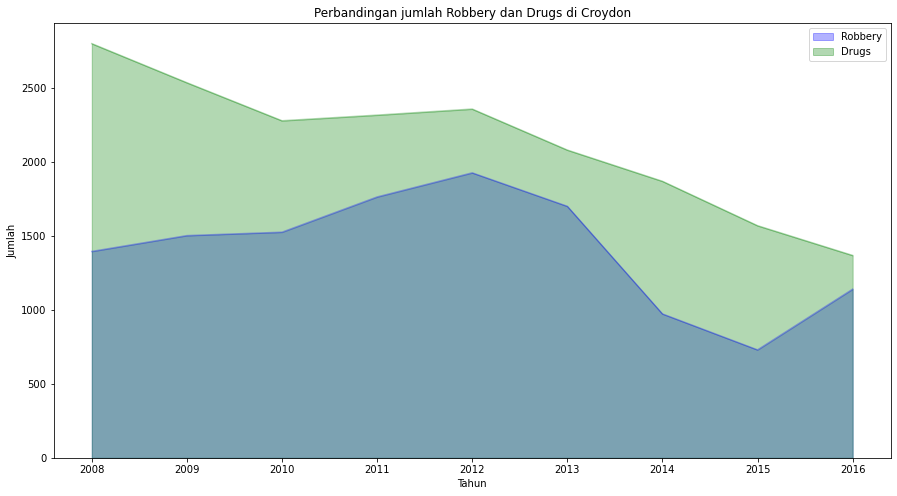

In [14]:
rob_n_drug.plot(kind='area', 
                alpha=0.3,
                stacked=False, 
                figsize=(15, 8),
                color=['blue', 'green']);
plt.title('Perbandingan jumlah Robbery dan Drugs di Croydon');
plt.xlabel('Tahun');
plt.ylabel('Jumlah');

Dari hasil visualisasi dapat diketahui:
1. Jumlah kasus Drugs lebih banyak dari Robbery pada tiap tahunnya
2. Trend dari kasus Drugs cenderung menurun dari tahun ke tahun, sedangkan pada kasus Robbery mencapai puncak pertamanya di tahun 2012 yang akhirnya mulai menurun di tahun-tahun berikutnya

#### Histogram

Melihat kembali dataset

In [15]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat dari data sebelumnya disini saya ingin memvisualisasikan dengan histogram mengenai perbandingan jumlah kasus pada kategori (major_categori) Drugs di wilayah Greenwich, Bromley, dan Redbridge

Pertama-tama disini saya ingin mengetahui jumlah kasus Drugs di masing-masing wilayah

In [16]:
wilayah = ['Greenwich', 'Bromley', 'Redbridge']
jml_green = []
jml_brom = []
jml_red = []

for i in wilayah:
    for j in year:
        kondisi = (df_london['borough'] == i) & (df_london['major_category'] == 'Drugs') & (df_london['year'] == j)
        hasil = df_london['value'][kondisi].sum()

        if i == 'Greenwich':
            jml_green.append(hasil)
        elif i == 'Bromley':
            jml_brom.append(hasil)
        else:
            jml_red.append(hasil)

print("Jumlah Kasus Greenwich :", jml_green)
print("Jumlah Kasus Bromley :", jml_brom)
print("Jumlah Kasus Redbridge :", jml_red)

Jumlah Kasus Greenwich : [1612, 1281, 987, 1285, 1313, 1311, 1235, 945, 867]
Jumlah Kasus Bromley : [1089, 1101, 1064, 1041, 1013, 1046, 990, 870, 728]
Jumlah Kasus Redbridge : [2064, 2062, 1806, 2253, 1928, 1796, 1538, 1272, 1017]


Setelah mendapat dan jumlah kasus di masing-masing wilayah, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [17]:
drugs = pd.DataFrame({
    "year" : year,
    "Greenwich" : jml_green,
    "Bromley" : jml_brom,
    "Redbridge" : jml_red
})

drugs

,year,Greenwich,Bromley,Redbridge
0,2008,1612,1089,2064
1,2009,1281,1101,2062
2,2010,987,1064,1806
3,2011,1285,1041,2253
4,2012,1313,1013,1928
5,2013,1311,1046,1796
6,2014,1235,990,1538
7,2015,945,870,1272
8,2016,867,728,1017


Mengubah kolom year menjadi index untuk mempermudah visualisasinya dan juga dikarenakan kolom year pada dataframe memiliki value yang unik

In [18]:
drugs.set_index('year', inplace=True)
drugs

,Greenwich,Bromley,Redbridge
year,,,
2008,1612,1089,2064
2009,1281,1101,2062
2010,987,1064,1806
2011,1285,1041,2253
2012,1313,1013,1928
2013,1311,1046,1796
2014,1235,990,1538
2015,945,870,1272
2016,867,728,1017


Mentranspose dataframe agar lebih sesuai dengan hasil yang diinginkan

In [19]:
drugs.T

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Greenwich,1612,1281,987,1285,1313,1311,1235,945,867
Bromley,1089,1101,1064,1041,1013,1046,990,870,728
Redbridge,2064,2062,1806,2253,1928,1796,1538,1272,1017


Lalu visualisasikan

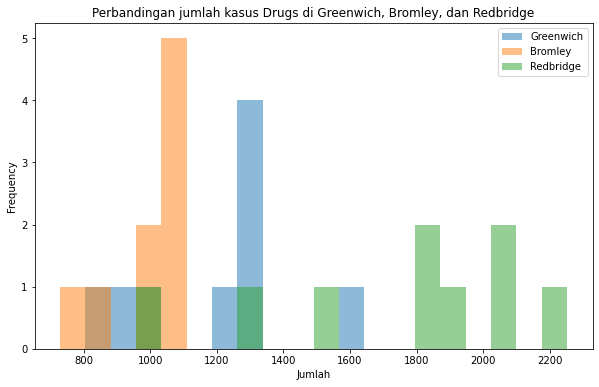

In [26]:
drugs.plot(kind='hist', alpha=0.5, bins=20, figsize=(10, 6));
plt.title('Perbandingan jumlah kasus Drugs di Greenwich, Bromley, dan Redbridge');
plt.xlabel('Jumlah');

Dari hasil visualisasi dapat diketahui bahwa jumlah kasus Drugs terbanyak dari tahun ke tahun banyak ditemukan di wilayah Redbridge hingga melebihi angka 1600 di tahun-tahun tertentu

#### Bar Chart

Melihat kembali dataset

In [27]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat dari data sebelumnya disini saya ingin memvisualisasikan dengan bar chart mengenai jumlah kasus Sexual Offences pada masing-masing wilayah (borough)

Pertama-tama disini saya ingin mengecek ada wilayah apa saja dari dataset

In [28]:
wilayah = list(df_london['borough'].unique())
wilayah

['Croydon',
 'Greenwich',
 'Bromley',
 'Redbridge',
 'Wandsworth',
 'Ealing',
 'Hounslow',
 'Newham',
 'Sutton',
 'Haringey',
 'Lambeth',
 'Richmond upon Thames',
 'Hillingdon',
 'Havering',
 'Barking and Dagenham',
 'Kingston upon Thames',
 'Westminster',
 'Hackney',
 'Enfield',
 'Harrow',
 'Lewisham',
 'Brent',
 'Southwark',
 'Barnet',
 'Waltham Forest',
 'Camden',
 'Bexley',
 'Kensington and Chelsea',
 'Islington',
 'Tower Hamlets',
 'Hammersmith and Fulham',
 'Merton',
 'City of London']

Selanjutnya saya akan menghitung jumlah kasus Sexual Offences di masing-masing wilayah (borough)

In [29]:
jml_soff = []

for i in wilayah:
    kondisi = (df_london['major_category'] == 'Sexual Offences') & (df_london['borough'] == i)
    hasil = df_london['value'][kondisi].sum()
    jml_soff.append(hasil)

print(jml_soff)

[55, 56, 31, 31, 47, 52, 40, 43, 20, 40, 70, 26, 44, 19, 49, 18, 59, 46, 38, 27, 71, 39, 40, 38, 34, 36, 22, 24, 40, 47, 45, 26, 0]


Setelah mendapat apa saja wilayah yang ada dan jumlah kasus Sexual Offences di masing-masing wilayah, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [30]:
s_offences = pd.DataFrame({
    "wilayah" : wilayah,
    "Jumlah" : jml_soff
})

s_offences

,wilayah,Jumlah
0,Croydon,55
1,Greenwich,56
2,Bromley,31
3,Redbridge,31
4,Wandsworth,47
5,Ealing,52
6,Hounslow,40
7,Newham,43
8,Sutton,20
9,Haringey,40


Mengubah kolom wilayah menjadi index untuk mempermudah visualisasinya dan juga dikarenakan kolom wilayah pada dataframe memiliki value yang unik

In [31]:
s_offences.set_index('wilayah', inplace=True)
s_offences

,Jumlah
wilayah,
Croydon,55
Greenwich,56
Bromley,31
Redbridge,31
Wandsworth,47
Ealing,52
Hounslow,40
Newham,43
Sutton,20


Lalu visualisasikan

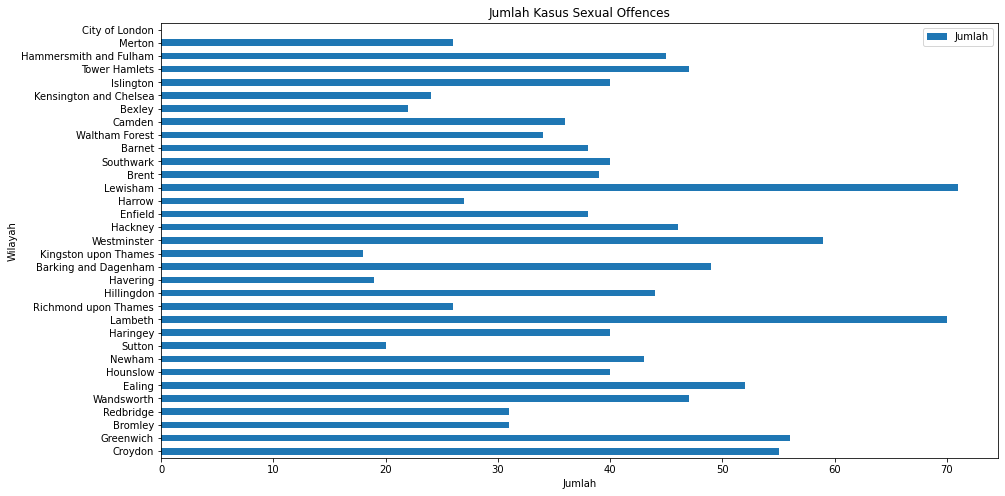

In [32]:
s_offences.plot(kind='barh', figsize=(15, 8));
plt.title('Jumlah Kasus Sexual Offences');
plt.xlabel('Jumlah');
plt.ylabel('Wilayah');

Dari hasil visualisasi dapat diketahui:
1. Wilayah Lewisham dan Lambeth adalah 2 negara terbanyak yang paling sering terjadi Sexual Offences.
2. Di wilayah City of London tidak ditemukan kasus Sexual Offences, sehingga sangat aman untuk menjadi referensi tempat tinggal terutama bagi anak muda.

#### Pie Chart

Melihat kembali dataset

In [33]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat dari data sebelumnya disini saya ingin memvisualisasikan dengan pie chart mengenai jumlah kasus pada masing-masing kategori (major_category) di wilayah City of London

Pertama-tama disini saya ingin melihat kategori kasus apa aja yang ada di kolom major_category

In [34]:
major_cat = list(df_london['major_category'].unique())
major_cat

['Burglary',
 'Violence Against the Person',
 'Robbery',
 'Theft and Handling',
 'Criminal Damage',
 'Drugs',
 'Fraud or Forgery',
 'Other Notifiable Offences',
 'Sexual Offences']

Selanjutnya saya ingin menghitung jumlah kasus di masing-masing kategori di wilayah City of London

In [35]:
jml_kasus = []

for i in major_cat:
    kondisi = (df_london['major_category'] == i) & (df_london['borough'] == 'City of London')
    hasil = df_london['value'][kondisi].sum()
    jml_kasus.append(hasil)

print(jml_kasus)

[15, 114, 24, 561, 16, 33, 0, 17, 0]


Setelah mendapat apa saja kategori kasus dan jumlahnya, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [36]:
kasus = pd.DataFrame({
    "kategori" : major_cat,
    "Jumlah" : jml_kasus
})

kasus

,kategori,Jumlah
0,Burglary,15
1,Violence Against the Person,114
2,Robbery,24
3,Theft and Handling,561
4,Criminal Damage,16
5,Drugs,33
6,Fraud or Forgery,0
7,Other Notifiable Offences,17
8,Sexual Offences,0


Mengubah kolom kategori menjadi index untuk mempermudah visualisasinya dan juga dikarenakan kolom kategori pada dataframe memiliki value yang unik

In [37]:
kasus.set_index('kategori', inplace=True)
kasus

,Jumlah
kategori,
Burglary,15
Violence Against the Person,114
Robbery,24
Theft and Handling,561
Criminal Damage,16
Drugs,33
Fraud or Forgery,0
Other Notifiable Offences,17
Sexual Offences,0


Lalu visualisasikan

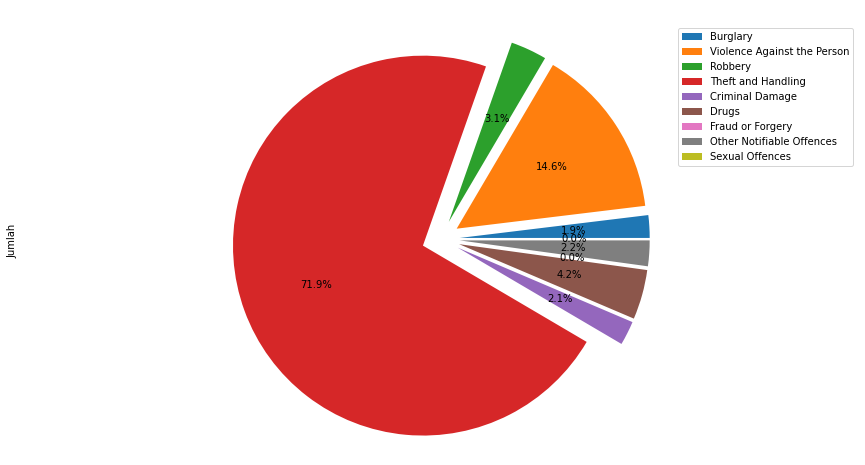

In [41]:
kasus['Jumlah'].plot(kind='pie', 
                     autopct='%.1f%%',
                     labels=None,
                     explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], 
                     figsize=(15, 8));
plt.axis('equal');
plt.legend(labels=kasus.index);
plt.title('Perbandingan persentase jumlah kasus di City of London', color='white');

Dari hasil visualisasi dapat diketahui bahwa kasus Thef and Handling sangat sering terjadi di wilayah City of London hingga melebihi 70% dari total kasus yang terjadi disana

#### Box Plot

Melihat kembali dataset

In [42]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat dari dataset sebelumnya disini saya ingin melihat persebebaran data dari kasus Violence Against the Person di Newham dan memvisualisasikannya dengan box plot

Pertama-tama disini saya ingin mengetahui jumlah kasus Violence Against the Person di Newham di tiap tahunnya

In [43]:
jml_viol = []

for i in year:
    kondisi = (df_london['borough'] == 'Newham') & (df_london['major_category'] == 'Violence Against the Person') & (df_london['year'] == i)
    hasil = df_london['value'][kondisi].sum()
    jml_viol.append(hasil)

print("Total Violence Against the Person :", jml_viol)

Total Violence Against the Person : [6808, 6773, 6784, 6147, 6615, 6154, 7880, 9414, 9646]


Setelah mendapat jumlah kasusnya, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [44]:
violence = pd.DataFrame({
    "Jumlah" : jml_viol
})

violence

,Jumlah
0,6808
1,6773
2,6784
3,6147
4,6615
5,6154
6,7880
7,9414
8,9646


Lalu visualisasikan

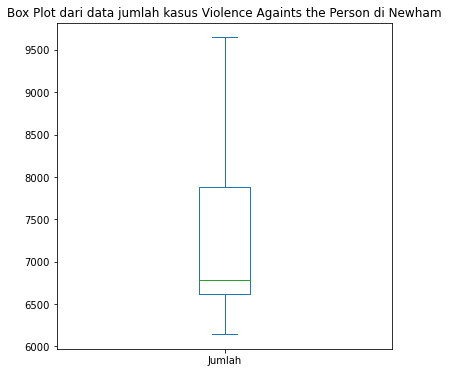

In [45]:
violence.plot(kind='box', figsize=(6, 6));
plt.title('Box Plot dari data jumlah kasus Violence Againts the Person di Newham');

Dari hasil visualisasi dapat diketahui bahwa persebaran datanya berada di kisaran 6500 hingga 8000 dan data tersebut memiliki nilai minimum sekitar 6200 serta nilai maksimum sekitar 9700

#### Scatter Plot

In [46]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat dari data sebelumnya disini saya ingin memvisualisasikan kolerasi dengan scatter plot mengenai kasus Drugs dan Criminal Damage

Pertama-tama saya ingin mengetahui jumlah dari kasus Drugs dan Criminal Damage

In [47]:
jml_crim = []
jml_drug = []

for i in year:
    kondisi_crim = (df_london['major_category'] == 'Criminal Damage') & (df_london['year'] == i)
    kondisi_drug = (df_london['major_category'] == 'Drugs') & (df_london['year'] == i)
    hasil_crim = df_london['value'][kondisi_crim].sum()
    hasil_drug = df_london['value'][kondisi_drug].sum()
    jml_crim.append(hasil_crim)
    jml_drug.append(hasil_drug)

print("Total Criminal Damage :", jml_crim)
print("Total Drugs :", jml_drug)

Total Criminal Damage : [91872, 85565, 77897, 70914, 62158, 56206, 59279, 62976, 64071]
Total Drugs : [68804, 60549, 58674, 57550, 51776, 50278, 44435, 39785, 38914]


Setelah mendapat jumlah kasusnya, kemudian mengubah data tersebut yang masih berupa list menjadi dataframe agar lebih mudah untuk divisualisasikan

In [48]:
drugs_crim = pd.DataFrame({
    "year" : year,
    "drugs" : jml_drug,
    "criminal_damage" : jml_crim
})

drugs_crim

,year,drugs,criminal_damage
0,2008,68804,91872
1,2009,60549,85565
2,2010,58674,77897
3,2011,57550,70914
4,2012,51776,62158
5,2013,50278,56206
6,2014,44435,59279
7,2015,39785,62976
8,2016,38914,64071


Lalu visualisasikan

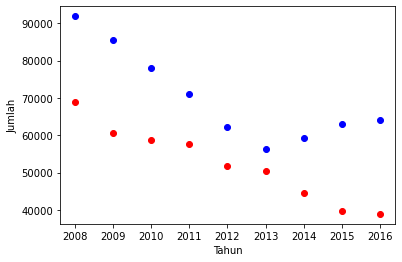

In [49]:
plt.scatter(drugs_crim['year'], drugs_crim['drugs'], color="red")
plt.scatter(drugs_crim['year'], drugs_crim['criminal_damage'], color="blue")
 
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

Dari hasil visualisasi dapat diketahui bahwa jumlah orang yang melakukan kasus Drugs tidak mempengaruhi jumlah orang melakukan kasus Criminal Damage